In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
file = "ex2data1.csv"
df = pd.read_csv(file)
df

,exam_1,exam_2,output
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


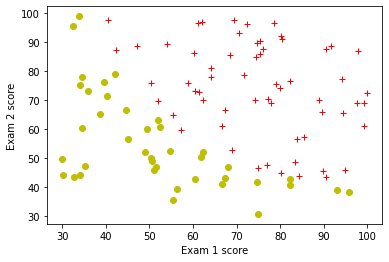

In [3]:
plt.plot(df.exam_1[df.output == 1],df.exam_2[df.output == 1],'r+',df.exam_1[df.output == 0],df.exam_2[df.output == 0],'yo')
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.show()


In [4]:
a = np.array([[2,3,4],[7,8,9]])
print(a)
print(np.sum(a,axis=0))
print(np.sum(a,axis=1))

[[2 3 4]
 [7 8 9]]
[ 9 11 13]
[ 9 24]


In [5]:
def normalize_feature(input) :
    input = (input - np.mean(input,axis=0))/np.std(input,axis=0)
    return(input)

In [6]:
def initialise_parameters(m) :
    input = np.array(df)[:,:2]
    input = normalize_feature(input)
    mod_input = np.c_[np.ones((m,1)),input]
    output = np.array(df)[:,-1].reshape(m,1)
    weights = np.zeros((3,1))
    return mod_input,output,weights

In [7]:
def sigmoid(z) :
    activation = 1/(1+np.exp(-z))
    return activation

In [8]:
def gradient_descent(X_mod,output,weights,m,learning_rate,iterations) :
    for i in range(iterations) :
        hypothesis = sigmoid(np.dot(X_mod,weights)).reshape(m,1)      # 100*3  3*1 ---> 100*1
        cost = -np.mean(output*np.log(hypothesis) + (1-output)*np.log(1-hypothesis))
        if i ==0 : print("Initial cost",cost)
        weights = weights - learning_rate*(np.mean(X_mod*(hypothesis-output),axis=0).reshape(3,1))   # 3*1
    print("Final cost",cost)
    return weights

In [9]:
m = len(df.output)
X_mod,output,weights = initialise_parameters(m)
print(X_mod.shape,output.shape,weights.shape)
print("Weights initially",weights)
weights = gradient_descent(X_mod,output,weights,m,learning_rate=0.03,iterations=1500)
print("Weights final",weights)

(100, 3) (100, 1) (3, 1)
Weights initially [[0.]
 [0.]
 [0.]]
Initial cost 0.6931471805599453
Final cost 0.2275584221979489
Weights final [[0.96360002]
 [2.40610147]
 [2.19646383]]


In [10]:
test = [1,45,85]
print(sigmoid(np.dot(normalize_feature(test),weights)))

[0.82367968]


In [11]:
p = sigmoid(np.dot(X_mod,weights)) >= 0.5
accuracy = 0
for k in range(len(p)) :
    if p[k] == output[k] :
        accuracy += 1 

print(accuracy)

89
